In [1]:
import pandas as pd

In [2]:
#Reading the data
import io

from google.colab import files
uploaded = files.upload()

Saving Xenophobiatweets.csv to Xenophobiatweets.csv


In [3]:
df = pd.read_csv('Xenophobiatweets.csv')
df.head()


,Unnamed: 0,Date,User,Tweet
0,0,2022-11-15 23:53:48+00:00,DsMetros,@an_adult_here @nocturnnina If u ever wanna se...
1,1,2022-11-15 23:39:33+00:00,MadonselaMgiba,He he South Africans are lazy what's this whil...
2,2,2022-11-15 22:13:05+00:00,DgDen,@Abramjee Deport all illegal foreigners! You w...
3,3,2022-11-15 21:50:19+00:00,Ancisacurse,#PutSouthAfricansFirst #OperationDudula https:...
4,4,2022-11-15 21:49:42+00:00,Ancisacurse,#PutSouthAfricansFirst #OperationDudula https:...


In [4]:
Version2data = df['Tweet']

Tweets = Version2data

print(Tweets)

0        @an_adult_here @nocturnnina If u ever wanna se...
1        He he South Africans are lazy what's this whil...
2        @Abramjee Deport all illegal foreigners! You w...
3        #PutSouthAfricansFirst #OperationDudula https:...
4        #PutSouthAfricansFirst #OperationDudula https:...
                               ...                        
19995    Maybe the #dudula people r not acting in our b...
19996    @MpumeleloLwana @kaunda_bongi @MtwanaXabiso Ev...
19997    And the very old ones not getting the picture(...
19998    @nhlanhla_lux_ Problem with the conversation a...
19999    Supporters of #OperationDudula took to Stellen...
Name: Tweet, Length: 20000, dtype: object


# Pre-Processing the Tweet Column

In [5]:
df['TweetsProc'] = df['Tweet'].str.replace('@', 'User')

print(df['TweetsProc'])

0        Useran_adult_here Usernocturnnina If u ever wa...
1        He he South Africans are lazy what's this whil...
2        UserAbramjee Deport all illegal foreigners! Yo...
3        #PutSouthAfricansFirst #OperationDudula https:...
4        #PutSouthAfricansFirst #OperationDudula https:...
                               ...                        
19995    Maybe the #dudula people r not acting in our b...
19996    UserMpumeleloLwana Userkaunda_bongi UserMtwana...
19997    And the very old ones not getting the picture(...
19998    Usernhlanhla_lux_ Problem with the conversatio...
19999    Supporters of #OperationDudula took to Stellen...
Name: TweetsProc, Length: 20000, dtype: object


In [6]:
df['TweetsProc'] = df['TweetsProc'].str.replace('http', 'link')

print(df['TweetsProc'])

0        Useran_adult_here Usernocturnnina If u ever wa...
1        He he South Africans are lazy what's this whil...
2        UserAbramjee Deport all illegal foreigners! Yo...
3        #PutSouthAfricansFirst #OperationDudula links:...
4        #PutSouthAfricansFirst #OperationDudula links:...
                               ...                        
19995    Maybe the #dudula people r not acting in our b...
19996    UserMpumeleloLwana Userkaunda_bongi UserMtwana...
19997    And the very old ones not getting the picture(...
19998    Usernhlanhla_lux_ Problem with the conversatio...
19999    Supporters of #OperationDudula took to Stellen...
Name: TweetsProc, Length: 20000, dtype: object


# Data Labelling

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

sentiments = SentimentIntensityAnalyzer()

df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['TweetsProc']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['TweetsProc']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['TweetsProc']]
df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['TweetsProc']]

df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Unnamed: 0,Date,User,Tweet,TweetsProc,Positive,Negative,Neutral,Compound
0,0,2022-11-15 23:53:48+00:00,DsMetros,@an_adult_here @nocturnnina If u ever wanna se...,Useran_adult_here Usernocturnnina If u ever wa...,0.000,0.000,1.000,0.0000
1,1,2022-11-15 23:39:33+00:00,MadonselaMgiba,He he South Africans are lazy what's this whil...,He he South Africans are lazy what's this whil...,0.137,0.186,0.676,-0.5719
2,2,2022-11-15 22:13:05+00:00,DgDen,@Abramjee Deport all illegal foreigners! You w...,UserAbramjee Deport all illegal foreigners! Yo...,0.000,0.429,0.571,-0.8507
3,3,2022-11-15 21:50:19+00:00,Ancisacurse,#PutSouthAfricansFirst #OperationDudula https:...,#PutSouthAfricansFirst #OperationDudula links:...,0.000,0.000,1.000,0.0000
4,4,2022-11-15 21:49:42+00:00,Ancisacurse,#PutSouthAfricansFirst #OperationDudula https:...,#PutSouthAfricansFirst #OperationDudula links:...,0.000,0.000,1.000,0.0000


Adding labels by grouping the polarity scores for sentiment analysis


**Industry standards:** 

* if the compound score of is more than 0.05 = Positive. 
* if the compound score is less than -0.05 =  Negative. 

otherwise, it’s neutral.



In [8]:
score = df['Compound'].values

sentiment = []

for i in score: 
  if i >= 0.05 : 
    sentiment.append('Positive')
  elif i<= -0.05 : 
    sentiment.append('Negative')
  else: 
    sentiment.append('Neutral')

df['Sentiment'] = sentiment

df.head()

,Unnamed: 0,Date,User,Tweet,TweetsProc,Positive,Negative,Neutral,Compound,Sentiment
0,0,2022-11-15 23:53:48+00:00,DsMetros,@an_adult_here @nocturnnina If u ever wanna se...,Useran_adult_here Usernocturnnina If u ever wa...,0.000,0.000,1.000,0.0000,Neutral
1,1,2022-11-15 23:39:33+00:00,MadonselaMgiba,He he South Africans are lazy what's this whil...,He he South Africans are lazy what's this whil...,0.137,0.186,0.676,-0.5719,Negative
2,2,2022-11-15 22:13:05+00:00,DgDen,@Abramjee Deport all illegal foreigners! You w...,UserAbramjee Deport all illegal foreigners! Yo...,0.000,0.429,0.571,-0.8507,Negative
3,3,2022-11-15 21:50:19+00:00,Ancisacurse,#PutSouthAfricansFirst #OperationDudula https:...,#PutSouthAfricansFirst #OperationDudula links:...,0.000,0.000,1.000,0.0000,Neutral
4,4,2022-11-15 21:49:42+00:00,Ancisacurse,#PutSouthAfricansFirst #OperationDudula https:...,#PutSouthAfricansFirst #OperationDudula links:...,0.000,0.000,1.000,0.0000,Neutral


Sentiment column will be the predicted target

In [9]:
#To check distribution/frequency of Sentiment column: 


print(df['Sentiment'].value_counts())


Neutral     7297
Negative    7176
Positive    5527
Name: Sentiment, dtype: int64


In [10]:
#Save new format of our data

df.to_csv("ProcessedTweets.csv")

# Build Model to predict Sentiments of new tweets. 

Steps needed: 



*  specify the Target to be predicted and the features needed for training. 

* Split data into training, validation data and also a test data.  


*   build the model
*   train/fit the model 


*   validate the model by predicting the validation dataset
*   evaluate the performance 



*   Test model using test data
*   evaluate the predictions.









In [11]:
data = pd.read_csv("ProcessedTweets.csv")

data.head()

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet,TweetsProc,Positive,Negative,Neutral,Compound,Sentiment
0,0,0,2022-11-15 23:53:48+00:00,DsMetros,@an_adult_here @nocturnnina If u ever wanna se...,Useran_adult_here Usernocturnnina If u ever wa...,0.000,0.000,1.000,0.0000,Neutral
1,1,1,2022-11-15 23:39:33+00:00,MadonselaMgiba,He he South Africans are lazy what's this whil...,He he South Africans are lazy what's this whil...,0.137,0.186,0.676,-0.5719,Negative
2,2,2,2022-11-15 22:13:05+00:00,DgDen,@Abramjee Deport all illegal foreigners! You w...,UserAbramjee Deport all illegal foreigners! Yo...,0.000,0.429,0.571,-0.8507,Negative
3,3,3,2022-11-15 21:50:19+00:00,Ancisacurse,#PutSouthAfricansFirst #OperationDudula https:...,#PutSouthAfricansFirst #OperationDudula links:...,0.000,0.000,1.000,0.0000,Neutral
4,4,4,2022-11-15 21:49:42+00:00,Ancisacurse,#PutSouthAfricansFirst #OperationDudula https:...,#PutSouthAfricansFirst #OperationDudula links:...,0.000,0.000,1.000,0.0000,Neutral


- specify the Target to be predicted and the features needed for training.

In [12]:
#Features dataset - The Tweet column that is pre-processed

features = data['TweetsProc'].values
print(features)
#Target dataset - The Sentiment column
labels = data['Sentiment'].values
print(labels)

['Useran_adult_here Usernocturnnina If u ever wanna see Xenophobia just check #OperationDudula'
 "He he South Africans are lazy what's this while working I am proud of my brother well done. Make you sure all the illegal immigrants and terrorists are removed from the work place where deserving Azanians are unemployed can be employed #PutSouthAficansFirst #OperationDudula links://t.co/7PUDxF5RFW"
 'UserAbramjee Deport all illegal foreigners! You will reduce crime by 95%!!! #PutSouthAficansFirst links://t.co/ovhSwa47P7'
 ...
 'And the very old ones not getting the picture(thinking Mandela is still alive), their IDs will be safely tucked away on election day, ANC has to GO🤞🏾\n\n#VoetsekANC \n#PutSouthAficansFirst links://t.co/9oysmPVbkx'
 'Usernhlanhla_lux_ Problem with the conversation around foreigners &amp; immigration is it has degenerated in2 stupidity (i.e all foreigners are criminals)\n\nReasons why we have to stop Immigration is\n1.High Unemployment rate\n2.Assimilation(a nation wi

- Clean the features dataset to remove punctuation marks, single characters using Regular expressions and also convert the text into lowercases. Imperative for Natural language task.

In [13]:
import numpy as np 
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [14]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove special characters.
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # Remove all single characters because of removing the special characters.
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start.
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Substitute multiple spaces with a single space.
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Remove prefixed 'b'.
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Convert text to Lowercase.
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

Convert Tweets to numbers using Term Frequency — Inverse Document Frequency approach (TF-IDF)

TF-IDF states that the words that occur less in all the tweets and more in an individual tweet contribute more towards classification

TF and IDF are calculated as follows:

TF = (Frequency of a word in the text) / (Total words in the text).


IDF = Log((Total number of texts) / (Number of texts containing the word))

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Split the Data into Training and Test Data Sets

In [16]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Models to try fitting

In [17]:
#Random Forest Model

model_rf = RandomForestClassifier(n_estimators = 200, random_state=0)

#Train model using tweets training dataset
model_rf.fit(x_training_data, y_training_data)

#predict the testdata
predictions_rf = model_rf.predict(x_test_data)

#Calculate the accuracy score.
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.71775


In [18]:
#evaluating model performance

print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

    Negative       0.67      0.76      0.71      1450
     Neutral       0.75      0.84      0.79      1453
    Positive       0.75      0.51      0.60      1097

    accuracy                           0.72      4000
   macro avg       0.72      0.70      0.70      4000
weighted avg       0.72      0.72      0.71      4000



67% correctly predicted Negative labels/sentiments
75% correctly predicted Neutral and Positive lables/sentiments 

Using Random Forest Model

In [19]:
#Logistic Regression Model

model_lr = LogisticRegression(max_iter=150)

#Train model using tweets training dataset
model_lr.fit(x_training_data, y_training_data)

#predict the testdata
predictions_lr = model_lr.predict(x_test_data)


#Calculate the accuracy score.
lr = accuracy_score(y_test_data, predictions_lr)
print(lr)

0.7845


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
#evaluating model performance
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

    Negative       0.77      0.77      0.77      1450
     Neutral       0.82      0.87      0.84      1453
    Positive       0.76      0.69      0.72      1097

    accuracy                           0.78      4000
   macro avg       0.78      0.78      0.78      4000
weighted avg       0.78      0.78      0.78      4000



In [21]:
#K Nearest Neighbors Model

model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

#Training
model_kn.fit(x_training_data, y_training_data)

#Predict testdata
predictions_kn = model_kn.predict(x_test_data)


#calculate accuracy score
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

#Evaluate performance model
print(classification_report(y_test_data, predictions_kn))


0.5615
              precision    recall  f1-score   support

    Negative       0.69      0.43      0.53      1450
     Neutral       0.50      0.90      0.64      1453
    Positive       0.66      0.28      0.39      1097

    accuracy                           0.56      4000
   macro avg       0.62      0.54      0.52      4000
weighted avg       0.61      0.56      0.53      4000



In [22]:
#Support Vector Machine Model

model_sv = SVC()

#training
model_sv.fit(x_training_data, y_training_data)

#Prediction
predictions_sv = model_sv.predict(x_test_data)

#calculating accuracy
sv = accuracy_score(y_test_data, predictions_sv)
print(sv)

#Evaluation of model
print(classification_report(y_test_data, predictions_sv))


0.77725
              precision    recall  f1-score   support

    Negative       0.74      0.78      0.76      1450
     Neutral       0.82      0.86      0.84      1453
    Positive       0.76      0.66      0.71      1097

    accuracy                           0.78      4000
   macro avg       0.78      0.77      0.77      4000
weighted avg       0.78      0.78      0.78      4000



# Model comparison

,Model,Accuracy_score
1,Logistic Regression,0.78450
3,Support Vector Machine,0.77725
0,Random Forest,0.71775
2,KNeighbours,0.56150


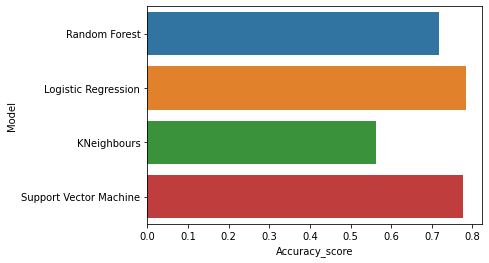

In [23]:
models = pd.DataFrame({
    'Model':['Random Forest', 'Logistic Regression', 'KNeighbours', 'Support Vector Machine'],
    'Accuracy_score' :[rf, lr, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

 Test Best model on predicting test data and compare to performance of the validation dataset.

In [24]:
#Getting test data

uploaded = files.upload()

Saving XenophobiaTesttweets.csv to XenophobiaTesttweets.csv


In [25]:
dftest = pd.read_csv('XenophobiaTesttweets.csv')

dftest.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-11-14 09:48:53+00:00,tonytendai,I don't know how it started but calling Nigeri...
1,1,2022-11-13 13:55:10+00:00,THEMBAMAZI1,@QueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u are...
2,2,2022-11-13 09:21:05+00:00,trankwility,"@ThusoMbedu is dating @JohnBoyega , does that ..."
3,3,2022-11-12 15:58:11+00:00,THEMBAMAZI1,@_SAPatriot @Mpu2mi @Kea91492014 🤣😂🤣 all jolif...
4,4,2022-11-12 08:32:43+00:00,DatBrothaD2,Somebody please🎙️ re-record the song Sarafina....


In [26]:
dftest['TweetsProc'] = dftest['Tweet'].str.replace('@', 'User')

print(dftest['TweetsProc'])

0      I don't know how it started but calling Nigeri...
1      UserQueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u ...
2      UserThusoMbedu is dating UserJohnBoyega , does...
3      User_SAPatriot UserMpu2mi UserKea91492014 🤣😂🤣 ...
4      Somebody please🎙️ re-record the song Sarafina....
                             ...                        
599    We did not struggle to embrace an intolerant s...
600    #Xenophia is unreasonable #fear. Fear has neve...
601    "UserIam_Thobeka: #Xenophia sies!!! amanyala w...
602                 #Xenophia sies!!! amanyala wodwa! :(
603    Is ıt true that our government now has strıct ...
Name: TweetsProc, Length: 604, dtype: object


In [27]:
dftest['TweetsProc'] = dftest['TweetsProc'].str.replace('http', 'link')

print(dftest['TweetsProc'])

0      I don't know how it started but calling Nigeri...
1      UserQueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u ...
2      UserThusoMbedu is dating UserJohnBoyega , does...
3      User_SAPatriot UserMpu2mi UserKea91492014 🤣😂🤣 ...
4      Somebody please🎙️ re-record the song Sarafina....
                             ...                        
599    We did not struggle to embrace an intolerant s...
600    #Xenophia is unreasonable #fear. Fear has neve...
601    "UserIam_Thobeka: #Xenophia sies!!! amanyala w...
602                 #Xenophia sies!!! amanyala wodwa! :(
603    Is ıt true that our government now has strıct ...
Name: TweetsProc, Length: 604, dtype: object


In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

sentiments = SentimentIntensityAnalyzer()

dftest['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in dftest['TweetsProc']]
dftest['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in dftest['TweetsProc']]
dftest['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in dftest['TweetsProc']]
dftest['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in dftest['TweetsProc']]

dftest.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,Date,User,Tweet,TweetsProc,Positive,Negative,Neutral,Compound
0,0,2022-11-14 09:48:53+00:00,tonytendai,I don't know how it started but calling Nigeri...,I don't know how it started but calling Nigeri...,0.060,0.051,0.889,0.1358
1,1,2022-11-13 13:55:10+00:00,THEMBAMAZI1,@QueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u are...,UserQueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u ...,0.173,0.115,0.712,0.2263
2,2,2022-11-13 09:21:05+00:00,trankwility,"@ThusoMbedu is dating @JohnBoyega , does that ...","UserThusoMbedu is dating UserJohnBoyega , does...",0.139,0.000,0.861,0.6369
3,3,2022-11-12 15:58:11+00:00,THEMBAMAZI1,@_SAPatriot @Mpu2mi @Kea91492014 🤣😂🤣 all jolif...,User_SAPatriot UserMpu2mi UserKea91492014 🤣😂🤣 ...,0.154,0.086,0.759,0.3818
4,4,2022-11-12 08:32:43+00:00,DatBrothaD2,Somebody please🎙️ re-record the song Sarafina....,Somebody please🎙️ re-record the song Sarafina....,0.000,0.000,1.000,0.0000


In [29]:
score1 = dftest['Compound'].values

sentiment = []

for i in score1: 
  if i >= 0.05 : 
    sentiment.append('Positive')
  elif i<= -0.05 : 
    sentiment.append('Negative')
  else: 
    sentiment.append('Neutral')

dftest['Sentiment'] = sentiment

dftest.head()

,Unnamed: 0,Date,User,Tweet,TweetsProc,Positive,Negative,Neutral,Compound,Sentiment
0,0,2022-11-14 09:48:53+00:00,tonytendai,I don't know how it started but calling Nigeri...,I don't know how it started but calling Nigeri...,0.060,0.051,0.889,0.1358,Positive
1,1,2022-11-13 13:55:10+00:00,THEMBAMAZI1,@QueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u are...,UserQueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u ...,0.173,0.115,0.712,0.2263,Positive
2,2,2022-11-13 09:21:05+00:00,trankwility,"@ThusoMbedu is dating @JohnBoyega , does that ...","UserThusoMbedu is dating UserJohnBoyega , does...",0.139,0.000,0.861,0.6369,Positive
3,3,2022-11-12 15:58:11+00:00,THEMBAMAZI1,@_SAPatriot @Mpu2mi @Kea91492014 🤣😂🤣 all jolif...,User_SAPatriot UserMpu2mi UserKea91492014 🤣😂🤣 ...,0.154,0.086,0.759,0.3818,Positive
4,4,2022-11-12 08:32:43+00:00,DatBrothaD2,Somebody please🎙️ re-record the song Sarafina....,Somebody please🎙️ re-record the song Sarafina....,0.000,0.000,1.000,0.0000,Neutral


# Test best model with test data and evaluate

In [30]:
#To check distribution/frequency of Sentiment column: 

print(dftest['Sentiment'].value_counts())

Negative    271
Positive    169
Neutral     164
Name: Sentiment, dtype: int64


In [31]:
dftest.to_csv("ProcessedTestTweets.csv")

In [32]:
dataTest = pd.read_csv("ProcessedTestTweets.csv")

dataTest.head()

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet,TweetsProc,Positive,Negative,Neutral,Compound,Sentiment
0,0,0,2022-11-14 09:48:53+00:00,tonytendai,I don't know how it started but calling Nigeri...,I don't know how it started but calling Nigeri...,0.060,0.051,0.889,0.1358,Positive
1,1,1,2022-11-13 13:55:10+00:00,THEMBAMAZI1,@QueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u are...,UserQueenKunta_198 🤣🙆‍♂️🤣 and you #jolofina u ...,0.173,0.115,0.712,0.2263,Positive
2,2,2,2022-11-13 09:21:05+00:00,trankwility,"@ThusoMbedu is dating @JohnBoyega , does that ...","UserThusoMbedu is dating UserJohnBoyega , does...",0.139,0.000,0.861,0.6369,Positive
3,3,3,2022-11-12 15:58:11+00:00,THEMBAMAZI1,@_SAPatriot @Mpu2mi @Kea91492014 🤣😂🤣 all jolif...,User_SAPatriot UserMpu2mi UserKea91492014 🤣😂🤣 ...,0.154,0.086,0.759,0.3818,Positive
4,4,4,2022-11-12 08:32:43+00:00,DatBrothaD2,Somebody please🎙️ re-record the song Sarafina....,Somebody please🎙️ re-record the song Sarafina....,0.000,0.000,1.000,0.0000,Neutral


In [43]:
#Features dataset - The Tweet column that is pre-processed

featuresTest = dataTest['TweetsProc'].values
#print(featuresTest)

#Target dataset - The Sentiment column
labelsTest = dataTest['Sentiment'].values
#print(labelsTest)


#Pre-Processing for model 

processed_featuresTest = []

for sentence in range(0, len(featuresTest)):
    # Remove special characters.
    processed_featuresT = re.sub(r'\W', ' ', str(featuresTest[sentence]))
    # Remove all single characters because of removing the special characters.
    processed_featuresT= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_featuresT)
    # Remove single characters from the start.
    processed_featuresT = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_featuresT)
    # Substitute multiple spaces with a single space.
    processed_featuresT = re.sub(r'\s+', ' ', processed_featuresT, flags=re.I)
    # Remove prefixed 'b'.
    processed_featuresT = re.sub(r'^b\s+', '', processed_featuresT)
    # Convert text to Lowercase.
    processed_featuresT = processed_featuresT.lower()

    processed_featuresTest.append(processed_featuresT)

In [44]:
vectorizerTest = TfidfVectorizer (max_features=153, stop_words=stopwords.words('english'))
processed_featuresTest = vectorizerTest.fit_transform(processed_featuresTest).toarray()

In [ ]:
#Logistic Regression Model

#predict the testdata
predictionsTest_lr = model_lr.predict(processed_featuresTest)


#Calculate the accuracy score.
lr = accuracy_score(labelsTest, predictionsTest_lr)
print(lr)

#evaluating model performance
print(classification_report(labelsTest, predictionsTest_lr))

# Model selection and app building

Goals: 


*   Select model
*   Specify how input is accepted: will they upload an excel file then the web app can return output of sentiments?
*   create web app


*   Create test set 
*   test web app 




